### (0 баллов) Считываем данные

In [35]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error
%matplotlib inline

In [3]:
from sklearn.datasets import load_boston

dataset = load_boston()
dataset.keys()

C:\Users\User\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (i

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

Каждая квартира имеет 13 признаков:

In [4]:
X = dataset['data']
X[:10]

array([[6.3200e-03, 1.8000e+01, 2.3100e+00, 0.0000e+00, 5.3800e-01,
        6.5750e+00, 6.5200e+01, 4.0900e+00, 1.0000e+00, 2.9600e+02,
        1.5300e+01, 3.9690e+02, 4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        6.4210e+00, 7.8900e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9690e+02, 9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, 0.0000e+00, 4.6900e-01,
        7.1850e+00, 6.1100e+01, 4.9671e+00, 2.0000e+00, 2.4200e+02,
        1.7800e+01, 3.9283e+02, 4.0300e+00],
       [3.2370e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.9980e+00, 4.5800e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9463e+02, 2.9400e+00],
       [6.9050e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        7.1470e+00, 5.4200e+01, 6.0622e+00, 3.0000e+00, 2.2200e+02,
        1.8700e+01, 3.9690e+02, 5.3300e+00],
       [2.9850e-02, 0.0000e+00, 2.1800e+00, 0.0000e+00, 4.5800e-01,
        6.4300e+00, 5.8700e

In [5]:
dataset['feature_names']

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

In [10]:
print(dataset['DESCR'])

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Хочется научиться предсказывать функцию цены квартиры. Предположительно, она зависит как-то от этих признаков.

In [6]:
y = dataset['target']
y[:10]

array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9])

### (1 балл) Разделите данные на тренировочную и тестовую части.

Тестовая часть должна составлять 10% выборки.


In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1)

### (1 балл) Обучение и применение модели
Обучите модель линейной регрессии на тренировочной части и предскажите результаты на тестовой части.



In [37]:
model = LinearRegression()
model.fit(X_train, y_train)
None

In [38]:
y_pred = model.predict(X_test)

### (2 балл) Валидация результата

Напишите свою функцию MSE, убедитесь, что она совпадает с реализацией из sklearn и посчитайте своей результат на тестовой части.

In [27]:
def MSE(y_real, y_pred):
    return np.mean((y_real - y_pred)**2)

In [29]:
MSE(y_test, y_pred) == mean_squared_error(y_test, y_pred)

True

In [41]:
MSE(y_test, y_pred)

24.071797410530294

Насколько хорошо вы предсказали цену? Сравните с наивным алгоритмом (предсказать среднюю цену на тренировочной части вне зависимости от признаков).

In [31]:
MSE(np.mean(y_train), y_test) #наивный алгоритм

105.85411764705883

In [32]:
MSE(np.mean(y_train), y_test) - MSE(y_test, y_pred)

81.78232023652853

### (2 балла) Улучшите результат.

Возможно, происходит переобучение, попробуйте применить регуляризацию, чтобы улучшить результат (то есть используйте Ridge вместо LinearRegression).

Нарисуйте график зависимости MSE от коэффициента регуляризации.

In [42]:
coef = np.arange(0.1, 2.0, 0.05)
print('все коэф-ты:')
print(coef)
lst = []
for i in coef:
    m1 = Ridge(alpha=i).fit(X_train, y_train)
    y_p = m1.predict(X_test)
    print(i, MSE(y_p, y_test))
    lst.append(MSE(y_p, y_test))

все коэф-ты:
[0.1  0.15 0.2  0.25 0.3  0.35 0.4  0.45 0.5  0.55 0.6  0.65 0.7  0.75
 0.8  0.85 0.9  0.95 1.   1.05 1.1  1.15 1.2  1.25 1.3  1.35 1.4  1.45
 1.5  1.55 1.6  1.65 1.7  1.75 1.8  1.85 1.9  1.95]
0.1 24.185092943167284
0.15000000000000002 24.239030889136647
0.20000000000000004 24.291180908274384
0.25000000000000006 24.341577969883485
0.30000000000000004 24.390267659372196
0.3500000000000001 24.43730258378769
0.40000000000000013 24.48273971860901
0.45000000000000007 24.52663845373999
0.5000000000000001 24.56905916091923
0.5500000000000002 24.61006215116931
0.6000000000000002 24.64970692465916
0.6500000000000001 24.688051640073464
0.7000000000000002 24.725152748801953
0.7500000000000002 24.761064752770572
0.8000000000000002 24.79584005480647
0.8500000000000002 24.829528877972763
0.9000000000000002 24.862179235987576
0.9500000000000003 24.89383694113251
1.0000000000000004 24.924545639309798
1.0500000000000003 24.95434686438587
1.1000000000000005 24.98328010584717
1.150000000000

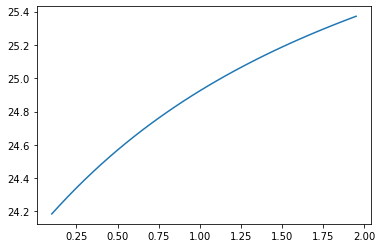

In [43]:
plt.plot(coef, lst)
plt.show()

Помогает ли регуляризация? Какой коэффициент регуляризации надо выбрать, чтобы ошибка была минимальной? Чему при этом равна ошибка? Напишите выводы о проведенных экспериментах

По графику видно, что чем меньше коэффицент регуляризации, тем больше MSE => Можем сделать вывод, что регуляризация здесь не нужна
Наименьший MSE при alpha = 0.1, MSE = 24.239030889136647